/tmp/ipython-input-2940799756.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 9.318981273059109


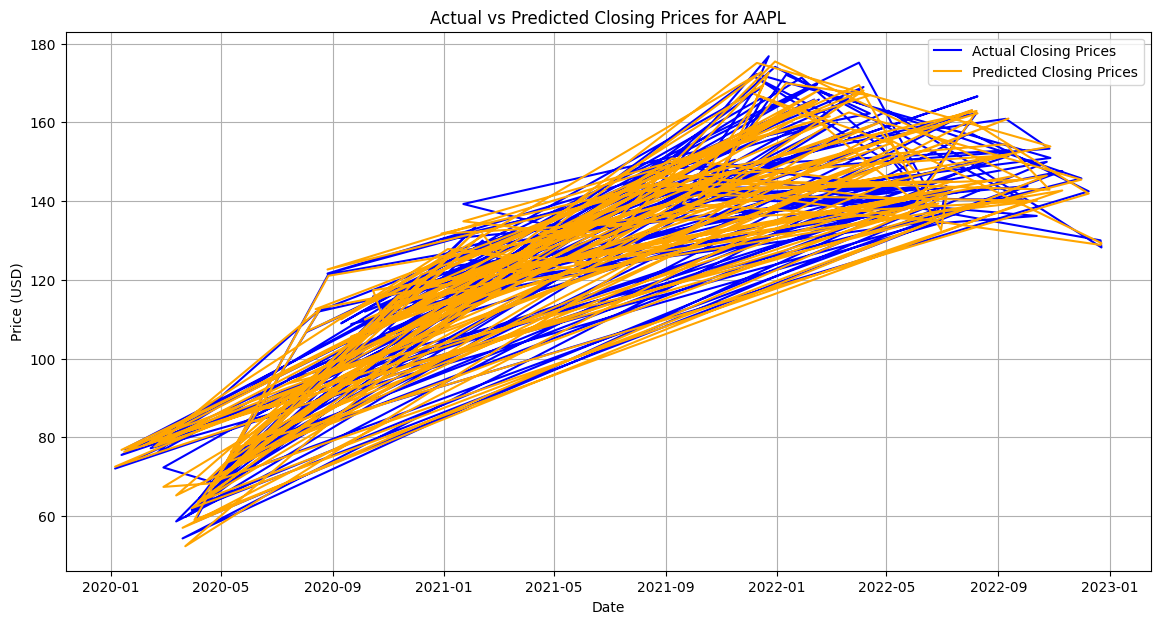

In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load historical stock data
stock_symbol = 'AAPL'  # Apple Inc.
data = yf.download(stock_symbol, start='2020-01-01', end='2023-01-01')

# Prepare the dataset
data['Next Close'] = data['Close'].shift(-1)  # Shift the Close price to create the target variable
data = data.dropna()  # Drop the last row with NaN value

# Features and target variable
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Next Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted closing prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Closing Prices', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Closing Prices', color='orange')
plt.title(f'Actual vs Predicted Closing Prices for {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()
